# Import

In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  True
OS:  win32


In [2]:
#Set up Test Variables:

#Test batch size
num_batches=100

transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

testset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=transform_test)

test_batch_size=int(numpy.shape(testset.data)[0]/num_batches)
#test_batch_size=100

testloader = torch.utils.data.DataLoader(
    testset, batch_size=test_batch_size, shuffle=False, num_workers=2)

test_features, test_labels = next(iter(testloader))
#Get num channels, width and height of input data
c,w,h=list(test_features[0].size())
#Batchsize, see load18.py or main.py for batch size
num_batches=int(numpy.shape(testset.data)[0]/test_batch_size)

Files already downloaded and verified


# Run

In [7]:
#%run load18.py

Files already downloaded and verified


In [17]:
#We introduce the test batch size because we may select the batch element on which apply an injection
pfi_model = pfi_core(net, h, w, test_batch_size, c=c,debug=True,use_cuda=True)

NameError: name 'net' is not defined

In [15]:
testM(pfi_model.ORIG_MODEL)

Loss: 0.179 | Acc: 95.520% (9552/10000)


0.9552

# Refactor test

In [ ]:
#get_total_layers()
len(pfi_model.OUTPUT_SIZE)


20

In [ ]:
pfi_model.OUTPUT_SIZE

[[1, 64, 32, 32],
 [1, 64, 32, 32],
 [1, 64, 32, 32],
 [1, 64, 32, 32],
 [1, 64, 32, 32],
 [1, 128, 16, 16],
 [1, 128, 16, 16],
 [1, 128, 16, 16],
 [1, 128, 16, 16],
 [1, 128, 16, 16],
 [1, 256, 8, 8],
 [1, 256, 8, 8],
 [1, 256, 8, 8],
 [1, 256, 8, 8],
 [1, 256, 8, 8],
 [1, 512, 4, 4],
 [1, 512, 4, 4],
 [1, 512, 4, 4],
 [1, 512, 4, 4],
 [1, 512, 4, 4]]

In [ ]:
#Downsample in the case of gitcode
j=0
for name, param in pfi_model.get_original_model().named_parameters():
    if "conv" in name or "downsample.0" in name: 
      j=j+1
      print(name,"|",param.size())

module.conv1.weight | torch.Size([64, 3, 3, 3])
module.layer1.0.conv1.weight | torch.Size([64, 64, 3, 3])
module.layer1.0.conv2.weight | torch.Size([64, 64, 3, 3])
module.layer1.1.conv1.weight | torch.Size([64, 64, 3, 3])
module.layer1.1.conv2.weight | torch.Size([64, 64, 3, 3])
module.layer2.0.conv1.weight | torch.Size([128, 64, 3, 3])
module.layer2.0.conv2.weight | torch.Size([128, 128, 3, 3])
module.layer2.1.conv1.weight | torch.Size([128, 128, 3, 3])
module.layer2.1.conv2.weight | torch.Size([128, 128, 3, 3])
module.layer3.0.conv1.weight | torch.Size([256, 128, 3, 3])
module.layer3.0.conv2.weight | torch.Size([256, 256, 3, 3])
module.layer3.1.conv1.weight | torch.Size([256, 256, 3, 3])
module.layer3.1.conv2.weight | torch.Size([256, 256, 3, 3])
module.layer4.0.conv1.weight | torch.Size([512, 256, 3, 3])
module.layer4.0.conv2.weight | torch.Size([512, 512, 3, 3])
module.layer4.1.conv1.weight | torch.Size([512, 512, 3, 3])
module.layer4.1.conv2.weight | torch.Size([512, 512, 3, 3])


In [ ]:
j

17

In [ ]:
#Shortcut for default pytorch net
j=0
for name, param in pfi_model.get_original_model().named_parameters():
    if "conv" in name or "shortcut.0" in name: 
      j=j+1
      print(name,"|",param.size())

module.conv1.weight | torch.Size([64, 3, 3, 3])
module.layer1.0.conv1.weight | torch.Size([64, 64, 3, 3])
module.layer1.0.conv2.weight | torch.Size([64, 64, 3, 3])
module.layer1.1.conv1.weight | torch.Size([64, 64, 3, 3])
module.layer1.1.conv2.weight | torch.Size([64, 64, 3, 3])
module.layer2.0.conv1.weight | torch.Size([128, 64, 3, 3])
module.layer2.0.conv2.weight | torch.Size([128, 128, 3, 3])
module.layer2.0.shortcut.0.weight | torch.Size([128, 64, 1, 1])
module.layer2.1.conv1.weight | torch.Size([128, 128, 3, 3])
module.layer2.1.conv2.weight | torch.Size([128, 128, 3, 3])
module.layer3.0.conv1.weight | torch.Size([256, 128, 3, 3])
module.layer3.0.conv2.weight | torch.Size([256, 256, 3, 3])
module.layer3.0.shortcut.0.weight | torch.Size([256, 128, 1, 1])
module.layer3.1.conv1.weight | torch.Size([256, 256, 3, 3])
module.layer3.1.conv2.weight | torch.Size([256, 256, 3, 3])
module.layer4.0.conv1.weight | torch.Size([512, 256, 3, 3])
module.layer4.0.conv2.weight | torch.Size([512, 512,

In [ ]:
j

20

In [ ]:
j=0
for name, param in pfi_model.get_original_model().named_parameters():
    if "features" in name and "weight" in name:
      j=j+1
      print(name,"|",param.size())

In [ ]:
for name, param in pfi_model.get_original_model().named_parameters():
    print(name)

module.conv1.weight
module.bn1.weight
module.bn1.bias
module.layer1.0.conv1.weight
module.layer1.0.bn1.weight
module.layer1.0.bn1.bias
module.layer1.0.conv2.weight
module.layer1.0.bn2.weight
module.layer1.0.bn2.bias
module.layer1.1.conv1.weight
module.layer1.1.bn1.weight
module.layer1.1.bn1.bias
module.layer1.1.conv2.weight
module.layer1.1.bn2.weight
module.layer1.1.bn2.bias
module.layer2.0.conv1.weight
module.layer2.0.bn1.weight
module.layer2.0.bn1.bias
module.layer2.0.conv2.weight
module.layer2.0.bn2.weight
module.layer2.0.bn2.bias
module.layer2.0.shortcut.0.weight
module.layer2.0.shortcut.1.weight
module.layer2.0.shortcut.1.bias
module.layer2.1.conv1.weight
module.layer2.1.bn1.weight
module.layer2.1.bn1.bias
module.layer2.1.conv2.weight
module.layer2.1.bn2.weight
module.layer2.1.bn2.bias
module.layer3.0.conv1.weight
module.layer3.0.bn1.weight
module.layer3.0.bn1.bias
module.layer3.0.conv2.weight
module.layer3.0.bn2.weight
module.layer3.0.bn2.bias
module.layer3.0.shortcut.0.weight
mo

In [ ]:
pfi_model.get_original_model()

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       

In [31]:
# Number of parameters of the resnet18
loc=[]
loc_=[]
for name, param in pfi_model.get_original_model().named_parameters():
        if "conv" in name or "shortcut.0" in name or "downsample.0" in name:
                for dim in param.size():
                    #loc[name].append(dim)
                    loc_.append({str(name):dim})
                loc.append()

In [38]:
# Number of parameters of the resnet18
loc=[]

for name, param in pfi_model.get_original_model().named_parameters():
        if "conv" in name or "shortcut.0" in name or "downsample.0" in name:
                loc_=[]
                for dim in param.size():
                    #loc[name].append(dim)
                    loc_.append(dim)
                loc.append(loc_)

In [43]:
np.prod(loc,axis=1)

array([   1728,   36864,   36864,   36864,   36864,   73728,  147456,
          8192,  147456,  147456,  294912,  589824,   32768,  589824,
        589824, 1179648, 2359296,  131072, 2359296, 2359296])

In [42]:
sum(np.prod(loc,axis=1))

11159232

In [49]:
list(pfi_model.get_original_model().named_parameters())[0][1][0]

tensor([[[-1.3289e-10, -2.7323e-10,  1.6403e-09],
         [-1.3949e-09, -5.3062e-10,  5.8823e-11],
         [ 5.1922e-10,  1.2216e-09,  1.5527e-09]],

        [[-2.0898e-10, -1.6902e-11,  9.4456e-10],
         [-6.7424e-10, -2.2620e-10,  1.7317e-10],
         [ 1.5561e-09,  7.0692e-10,  1.3345e-09]],

        [[ 7.5248e-10,  4.7087e-10,  1.2638e-09],
         [-5.2548e-10, -5.2869e-10,  9.4454e-11],
         [ 2.9251e-10,  3.5621e-10,  7.8323e-10]]], device='cuda:0',
       grad_fn=<SelectBackward>)

# Injections

In [ ]:
#import error_models_custom

In [ ]:
#wiModel = error_models_custom.random_weight_inj(pfi_model)

In [ ]:
pfi_model.get_total_conv()

20

In [ ]:
pfi_model.declare_weight_fi(conv_num=0,k=0, c=0, h=0, w=0, value=0)

In [17]:
list(pfi_model.get_corrupted_model().named_parameters())[0][1][0]

tensor([[[ 0.0000e+00, -2.7323e-10,  1.6403e-09],
         [-1.3949e-09, -5.3062e-10,  5.8823e-11],
         [ 5.1922e-10,  1.2216e-09,  1.5527e-09]],

        [[-2.0898e-10, -1.6902e-11,  9.4456e-10],
         [-6.7424e-10, -2.2620e-10,  1.7317e-10],
         [ 1.5561e-09,  7.0692e-10,  1.3345e-09]],

        [[ 7.5248e-10,  4.7087e-10,  1.2638e-09],
         [-5.2548e-10, -5.2869e-10,  9.4454e-11],
         [ 2.9251e-10,  3.5621e-10,  7.8323e-10]]], device='cuda:0',
       grad_fn=<SelectBackward>)

In [40]:
manyWInj = manyInj.many_w_injections(pfi_model,1000)

N injections:  1000
 Injection:  999

In [19]:
list(manyWInj.named_parameters())[0][1][0]

tensor([[[-1.3289e-10, -2.7323e-10,  1.6403e-09],
         [-1.3949e-09, -5.3062e-10,  5.8823e-11],
         [ 5.1922e-10,  1.2216e-09,  1.5527e-09]],

        [[-2.0898e-10, -1.6902e-11,  9.4456e-10],
         [-6.7424e-10, -2.2620e-10,  1.7317e-10],
         [ 1.5561e-09,  7.0692e-10,  1.3345e-09]],

        [[ 7.5248e-10,  4.7087e-10,  1.2638e-09],
         [-5.2548e-10, -5.2869e-10,  9.4454e-11],
         [ 2.9251e-10,  3.5621e-10,  7.8323e-10]]], device='cuda:0',
       grad_fn=<SelectBackward>)

In [41]:
testM(manyWInj)

Loss: 3.162 | Acc: 26.370% (2637/10000)


0.2637

# Injections in git(custom) and pytorch(default) resnets

In [43]:
net_custom=model_actions.load_custom("checkpoint")
net_default=model_actions.load("checkpoint_default",num_classes=1000)

In [44]:
model_actions.test(net_custom)

 [================================================================>]  Step: 1h47s | Tot: 3h29m | Loss: 0.247 | Acc: 93.430% (9343/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1

0.9343

In [45]:
model_actions.test(net_default)

 [================================================================>]  Step: 29s869ms | Tot: 3h30m | Loss: 0.600 | Acc: 80.090% (8009/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1

0.8009

In [47]:
from model_actions import test

In [49]:
pfi_model = pfi_core(net_custom.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())
acc_v=[]
for i in range(0,10):
  manyWInj = many_inj.many_w_injections(pfi_model,1000)
  acc=test(manyWInj)
  acc_v.append(acc)
print(test(pfi_model.ORIG_MODEL))
print(np.average(acc_v))
log.save(acc_v,"net_custom_1000_w_inj_10_times")

N injections:  1000
 Injection:  999 [================================================================>]  Step: 3m23s | Tot: 3h40m | Loss: 3.532 | Acc: 21.280% (2128/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [50]:
load=log.load("net_custom_1000_w_inj_10_times")
print(np.mean(load))
print(np.std(load))

0.29473
0.11248041651772098


In [48]:
pfi_model = pfi_core(net_default.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())
acc_v=[]
for i in range(0,10):
  manyWInj = many_inj.many_w_injections(pfi_model,1000)
  acc=test(manyWInj)
  acc_v.append(acc)
print(test(pfi_model.ORIG_MODEL))
print(np.average(acc_v))
log.save(acc_v,"net_default_1000_w_inj_10_times")

N injections:  1000
 Injection:  999 [================================================================>]  Step: 2m49s | Tot: 3h33m | Loss: 0.686 | Acc: 77.190% (7719/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
load=log.load("net_default_1000_w_inj_10_times")
print(np.mean(load))
print(np.std(load))

# Test for batches parameter var

In [5]:
import load

In [16]:
#For git resnet
#%run load18.py

Files already downloaded and verified


In [6]:
import load
net_default=load.load('checkpoint_default',num_classes=1000)
net_256=load.load('default_b_size_256')
net_512=load.load('default_b_size_512')

In [26]:
testM(net_default)

Loss: 0.600 | Acc: 80.090% (8009/10000)


0.8009

In [12]:
net=load.load('checkpoint',num_classes=1000)

In [29]:
!ls checkpoints

Group_Norm	    checkpoint_default_colab  test
checkpoint	    default_2		      test_num_classes_10
checkpoint_custom   default_b_size_256	      test_stride
checkpoint_default  default_b_size_512


In [38]:
net_colab=load.load('checkpoint_default_colab',num_classes=1000)

In [32]:
from pytorchfi_c.core import fault_injection as pfi_core

In [33]:
pfi_model = pfi_core(net_colab, h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

NameError: name 'net_colab' is not defined

In [41]:
pfi_model = pfi_core(net_256.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())
acc_v=[]
for i in range(0,10):
  manyWInj = many_inj.many_w_injections(pfi_model,1000)
  acc=testM(manyWInj)
  acc_v.append(acc)
print(testM(pfi_model.ORIG_MODEL))
print(np.average(acc_v))


N injections:  1000
 Injection:  999Loss: 1.994 | Acc: 56.490% (5649/10000)
N injections:  1000
 Injection:  999Loss: 1.723 | Acc: 62.260% (6226/10000)
N injections:  1000
 Injection:  999Loss: 1.392 | Acc: 69.510% (6951/10000)
N injections:  1000
 Injection:  999Loss: 1.407 | Acc: 67.640% (6764/10000)
N injections:  1000
 Injection:  999Loss: 1.544 | Acc: 64.590% (6459/10000)
N injections:  1000
 Injection:  999Loss: 1.970 | Acc: 57.630% (5763/10000)
N injections:  1000
 Injection:  999Loss: 2.743 | Acc: 50.710% (5071/10000)
N injections:  1000
 Injection:  999Loss: 1.372 | Acc: 69.700% (6970/10000)
N injections:  1000
 Injection:  999Loss: 1.707 | Acc: 61.560% (6156/10000)
N injections:  1000
 Injection:  999Loss: 1.425 | Acc: 66.810% (6681/10000)
Loss: 0.520 | Acc: 88.590% (8859/10000)
0.8859
0.6269


In [62]:
pfi_model = pfi_core(net_512.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())
acc_v=[]
for i in range(0,10):
  manyWInj = manyInj.many_w_injections(pfi_model,1000)
  acc=testM(manyWInj)
  acc_v.append(acc)
print(testM(pfi_model.ORIG_MODEL))
print(np.average(acc_v))

N injections:  1000
 Injection:  999Loss: 2.077 | Acc: 58.830% (5883/10000)
N injections:  1000
 Injection:  999Loss: 1.951 | Acc: 58.580% (5858/10000)
N injections:  1000
 Injection:  999Loss: 2.285 | Acc: 54.380% (5438/10000)
N injections:  1000
 Injection:  999Loss: 1.997 | Acc: 59.490% (5949/10000)
N injections:  1000
 Injection:  999Loss: 2.872 | Acc: 46.040% (4604/10000)
N injections:  1000
 Injection:  999Loss: 1.810 | Acc: 60.550% (6055/10000)
N injections:  1000
 Injection:  999Loss: 2.431 | Acc: 50.610% (5061/10000)
N injections:  1000
 Injection:  999Loss: 2.215 | Acc: 57.320% (5732/10000)
N injections:  1000
 Injection:  999Loss: 2.469 | Acc: 48.690% (4869/10000)
N injections:  1000
 Injection:  999Loss: 3.252 | Acc: 38.140% (3814/10000)
Loss: 0.512 | Acc: 88.730% (8873/10000)
0.8873
0.53263


# Weight with inj bit flip

In [5]:
import load
net_default=load.load('checkpoint_default',num_classes=1000)
#net_256=load.load('default_b_size_256')
#net_512=load.load('default_b_size_512')

import model_actions
from model_actions import test

Files already downloaded and verified


In [6]:
model_actions.test(net_default)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


 [================================================================>]  Step: 6m24s | Tot: 6m24s | Loss: 0.600 | Acc: 80.090% (8009/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1

0.8009

In [10]:
stats.func_avg(model_actions.test,3,net_default)

 [================================================================>]  Step: 4m12s | Tot: 14m22s | Loss: 0.600 | Acc: 80.090% (8009/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              1

0.8009

## Bit importnace

In [6]:
pfi_model = pfi_core(net_default.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
#pfi_model.declare_weight_bit_fi()

## Showing that a single bit flip(62 zero based, layer 0) may destroy the model inference (10%)

In [12]:
#Test changing specific bit in layer 0
mwinj=pfi_model.declare_weight_bit_fi(conv_num=0,k=0, c=0, h=0, w=0, value=0, bits=62)
v=list(pfi_model.get_corrupted_model().named_parameters())[0][1][0][0][0][0].item()
print(v)
test(mwinj)

inf
 [================================================================>]  Step: 2m11s | Tot: 10m54s | Loss: nan | Acc: 10.140% (1014/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

0.1014

In [14]:
#Changing in another layer
mwinj=pfi_model.declare_weight_bit_fi(conv_num=9,k=0, c=0, h=0, w=0, value=0, bits=62)
v=list(pfi_model.get_corrupted_model().named_parameters())[0][1][0][0][0][0].item()
print(v)
test(mwinj)

0.06807292997837067
 [================================================================>]  Step: 41s338ms | Tot: 12m38s | Loss: nan | Acc: 10.010% (1001/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

0.1001

In [15]:
many_bit_inj=many_inj.many_w_bit_injections(pfi_model,1,bit=63)
model_actions.test(pfi_model.get_corrupted_model())

N injections:  1
 Injection:  0 [================================================================>]  Step: 55s397ms | Tot: 56m19s | Loss: 0.572 | Acc: 80.680% (8068/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

0.8068

Save next output

In [199]:

#pfi_model = pfi_core(net_512.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())
acc_v=[]
for i in range(0,10):
  manyWInj = many_inj.many_w_bit_injections(pfi_model,100)
  acc=testM(manyWInj)
  acc_v.append(acc)
print(testM(pfi_model.ORIG_MODEL))
print(np.average(acc_v))

N injections:  100
 Injection:  99 [================================================================>]  Step: 4h26m | Tot: 4h26m | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N injections:  100
 Injection:  99 [================================================================>]  Step: 1m4s | Tot: 4h27m | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N injections:  100
 Injection:  99 [================================================================>]  Step: 1m2s | Tot: 4h28m | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N injections:  100
 Injection:  99 [================================================================>]  Step: 1m2s | Tot: 4h29m | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N injections:  100
 Injection:  99 [================================================================>]  Step: 1m2s | Tot: 4h30m | Loss: 0.563 | Acc: 80.910% (8091/10000) 100/100 
N injections:  100
 Injection:  99 [================================================================>]  

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [16]:
from model_actions import test

In [10]:
#Save this output
#pfi_model = pfi_core(net_512.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())
acc_v=[]
for i in range(0,10):
  manyWInj = many_inj.many_w_bit_injections(pfi_model,1,bits=62)
  acc=test(manyWInj)
  acc_v.append(acc)
print(np.average(acc_v))

 [================================================================>]  Step: 3m36s | Tot: 9m25s | Loss: nan | Acc: 10.050% (1005/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1

In [19]:
# inj per bit
#pfi_model = pfi_core(net_512.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())
acc_v=[]
for i in range(64):
  manyWInj = many_inj.many_w_bit_injections(pfi_model,10000,bits=i)
  acc=test(manyWInj)
  acc_v.append(acc)
log.save(acc_v,"10000_w_inj_per_bit")


 [================================================================>]  Step: 55m4s | Tot: 2h9m | Loss: 0.563 | Acc: 81.020% (8102/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                1

In [27]:
name="1000_w_inj_per_bit"
load=log.load(name)
fig, ax = plt.subplots()
ax.plot(load)
fig.savefig("images/"+name+".png")

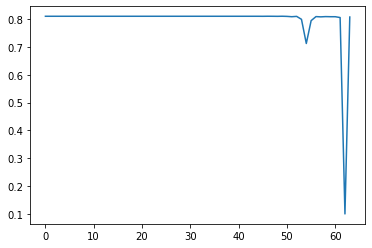

In [20]:
from pytorchfi_c.core import bit_flip_f32

In [ ]:
# output value from bitflip
from pytorchfi_c.core import bit_flip_f32
f=np.float64(0.1)
print(np.finfo(f))
acc_v=[]
for i in range(64):
  acc_v.append(bit_flip_f32(f))
log.save(acc_v,"bitflip64_per_bit_orig_0_1")

# Weight injection with FC

In [25]:
import load
net_default=load.load('checkpoint_default',num_classes=1000)
net_256=load.load('default_b_size_256')
#net_512=load.load('default_b_size_512')

import model_actions
from model_actions import test

In [6]:
model_actions.test(net_default)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


 [================================================================>]  Step: 1m46s | Tot: 1m46s | Loss: 0.600 | Acc: 80.090% (8009/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1

0.8009

In [17]:
for name,param in net_default.named_parameters():
    print(name)

module.conv1.weight
module.bn1.weight
module.bn1.bias
module.layer1.0.conv1.weight
module.layer1.0.bn1.weight
module.layer1.0.bn1.bias
module.layer1.0.conv2.weight
module.layer1.0.bn2.weight
module.layer1.0.bn2.bias
module.layer1.1.conv1.weight
module.layer1.1.bn1.weight
module.layer1.1.bn1.bias
module.layer1.1.conv2.weight
module.layer1.1.bn2.weight
module.layer1.1.bn2.bias
module.layer2.0.conv1.weight
module.layer2.0.bn1.weight
module.layer2.0.bn1.bias
module.layer2.0.conv2.weight
module.layer2.0.bn2.weight
module.layer2.0.bn2.bias
module.layer2.0.downsample.0.weight
module.layer2.0.downsample.1.weight
module.layer2.0.downsample.1.bias
module.layer2.1.conv1.weight
module.layer2.1.bn1.weight
module.layer2.1.bn1.bias
module.layer2.1.conv2.weight
module.layer2.1.bn2.weight
module.layer2.1.bn2.bias
module.layer3.0.conv1.weight
module.layer3.0.bn1.weight
module.layer3.0.bn1.bias
module.layer3.0.conv2.weight
module.layer3.0.bn2.weight
module.layer3.0.bn2.bias
module.layer3.0.downsample.0.w

In [19]:
for name,param in net_default.named_parameters():
    if "fc.weight" in name:
        print(param.size())

torch.Size([1000, 512])


In [26]:
pfi_model = pfi_core(net_256.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

In [12]:
pfi_model.get_total_conv()
#so FC layer should be the last one, 20

20

In [8]:
_=pfi_model.declare_weight_fi_fc(conv_num=20,value=0,fcx_v=0,fcy_v=0)

In [11]:
for name,param in pfi_model.get_corrupted_model().named_parameters():
    if "fc.weight" in name:
        print(param)

Parameter containing:
tensor([[ 0.0000, -0.0848,  0.0974,  ...,  0.1891, -0.0144,  0.0007],
        [ 0.0941,  0.0284,  0.0587,  ..., -0.0556,  0.0267,  0.0074],
        [ 0.2396,  0.1323,  0.0023,  ...,  0.1205,  0.0316,  0.1029],
        ...,
        [-0.0012, -0.0012, -0.0008,  ..., -0.0007, -0.0005, -0.0007],
        [-0.0012, -0.0012, -0.0008,  ..., -0.0007, -0.0005, -0.0007],
        [-0.0012, -0.0012, -0.0008,  ..., -0.0007, -0.0005, -0.0007]],
       requires_grad=True)


In [18]:
i=0
for name, param in net_default.named_parameters():
    if "conv" in name or "shortcut.0" in name or "downsample.0" in name or "fc.weight" in name:
        i=i+1
        print(name)

print(i)

module.conv1.weight
module.layer1.0.conv1.weight
module.layer1.0.conv2.weight
module.layer1.1.conv1.weight
module.layer1.1.conv2.weight
module.layer2.0.conv1.weight
module.layer2.0.conv2.weight
module.layer2.0.downsample.0.weight
module.layer2.1.conv1.weight
module.layer2.1.conv2.weight
module.layer3.0.conv1.weight
module.layer3.0.conv2.weight
module.layer3.0.downsample.0.weight
module.layer3.1.conv1.weight
module.layer3.1.conv2.weight
module.layer4.0.conv1.weight
module.layer4.0.conv2.weight
module.layer4.0.downsample.0.weight
module.layer4.1.conv1.weight
module.layer4.1.conv2.weight
module.fc.weight
21


In [9]:
model_actions.test(pfi_model.get_corrupted_model())

 [================================================================>]  Step: 1m7s | Tot: 2m54s | Loss: 0.571 | Acc: 80.700% (8070/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                1

0.807

## Many inj in FC

In [38]:
mwifc=many_inj.many_w_injections_fc(pfi_model=pfi_model,n_inj=10000,corrupt_conv=20)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,

In [39]:
model_actions.test(mwifc)

 [================================================================>]  Step: 49s322ms | Tot: 29m22s | Loss: 4.129 | Acc: 35.660% (3566/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1

0.3566

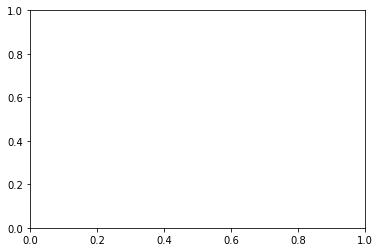

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt




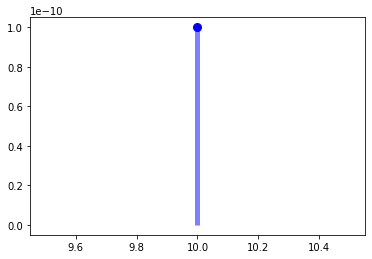

In [13]:
fig, ax = plt.subplots(1, 1)
ndata=10
trials=10
n, p, x = trials, 1/ndata, ndata
binom.pmf(x, n, p)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
fig.show()

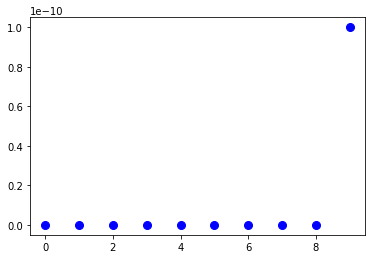

In [19]:
ndata=10
trials=10

prob_v=[]
for trial in range(trials):
    n, p, x = trial, 1/ndata, ndata
    prob=binom.pmf(x, n+1, p)
    prob_v.append(prob)
fig, ax = plt.subplots(1, 1)
ax.plot(prob_v, 'bo', ms=8, label='binom pmf')
fig.show()

In [24]:
!conda install sympy --yes
import sympy

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - anaconda/linux-64::numpy==1.19.1=py38hbc911f0_0
  - pytorch/linux-64::torchaudio==0.9.0=py38
  - anaconda/linux-64::mkl-service==2.3.0=py38he904b0f_0
  - anaconda/linux-64::ipykernel==5.3.4=py38h5ca1d4c_0
  - anaconda/noarch::python-dateutil==2.8.1=py_0
  - anaconda/linux-64::mkl_fft==1.2.0=py38h23d657b_0
  - pytorch/linux-64::torchvision==0.10.0=py38_cu102
  - pytorch/linux-64::pytorch==1.9.0=py3.8_cuda10.2_cudnn7.6.5_0
  - defaults/linux-64::py-xgboost==1.3.3=py38h06a4308_0
  - anaconda/linux-64::mkl_random==1.1.0=py38h962f231_0
  - anaconda/noarch::jupyter_client==6.1.7=py_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | 
The environment is inconsistent, please check the package plan 

In [33]:
from sympy.functions.combinatorial.numbers import stirling

In [64]:
!conda update pillow --yes

In [48]:
#n: number of trials
#k: number of elements
n=4
k=2
res=stirling(n,k)
print(res)

7


SyntaxError: invalid syntax (<ipython-input-39-ca0e74cc687f>, line 1)

In [58]:
prob=np.math.factorial(k)*float(stirling(n,k))/(k**n)
print(res)

0.875


In [61]:
from matplotlib import pyplot as plt
from sympy.functions.combinatorial.numbers import stirling
prob_v=[]
k=10
n_max=100
for n in range(1,n_max):
    prob=np.math.factorial(k)*float(stirling(n,k))/(k**n)
    prob_v.append(prob)
plt.plot(prob_v)


AttributeError: module 'PIL' has no attribute 'Image'

<Figure size 432x288 with 1 Axes>

In [ ]:
K!S(N,K)/K^N

In [47]:
print(stirling(4,2))

7


# Progressive injections:

In [8]:
import load
net_default=load.load('checkpoint_default',num_classes=1000)
#net_256=load.load('default_b_size_256')
#net_512=load.load('default_b_size_512')
import model_actions
import many_inj

Files already downloaded and verified


In [9]:
from pytorchfi_c.core import fault_injection as pfi_core

In [10]:
pfi_model = pfi_core(net_default.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [9]:
#progresive random -1,1 w injections
# avg_v=[]
# for k in range(1):
#     print(k)
#     j=k*10
#     acc_v=[]
#     for i in range(0,10):
#         model_m_inj = many_inj.many_w_injections(pfi_model,j)
#         acc=model_actions.test(model_m_inj)
#         acc_v.append(acc)
#     av=np.average(acc_v)
#     print(av)
#     avg_v.append(av)

0
N injections:  0
 [================================================================>]  Step: 25m34s | Tot: 25m34s | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N injections:  0
 [================================================================>]  Step: 9s427ms | Tot: 25m43s | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N injections:  0
 [================================================================>]  Step: 7s738ms | Tot: 25m51s | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N injections:  0
 [================================================================>]  Step: 8s573ms | Tot: 26m273ms | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N injections:  0
 [================================================================>]  Step: 9s803ms | Tot: 26m10s | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N injections:  0
 [================================================================>]  Step: 9s713ms | Tot: 26m19s | Loss: 0.563 | Acc: 81.020% (8102/10000) 100/100 
N

In [11]:
def progressive_inj(i,n,step=10):
    '''i:n steps; n: n experiments'''
    avg_v=[]
    for k in range(i):
        print(k)
        j=k*step
        acc_v=[]
        for i in range(0,n):
            model_m_inj = many_inj.many_w_injections(pfi_model,j)
            acc=model_actions.test(model_m_inj)
            acc_v.append(acc)
        av=np.average(acc_v)
        print(av)
        avg_v.append(av)
    return avg_v

In [39]:
# import importlib
# importlib.reload(log)

<module 'log' from '/mnt/batch/tasks/shared/LS_root/mounts/clusters/ins07220148/code/Users/S242660/thesis/log.py'>

In [12]:
import log

In [13]:
log.log("test")

In [40]:
#log.log_save(progressive_inj,"test.json")(3,1)

0
N injections:  0
 [================================================================>]  Step: 36s87ms | Tot: 33m7s | Loss: 0.563 | Acc: 81.020% (8102/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [15]:
#import log

log.log_save(progressive_inj,"prog_w_inj_100_20_100.json")(10,10,step=1000)

0
N injections:  0
 [================================================================>]  Step: 5m19s | Tot: 5m19s | Loss: 0.563 | Acc: 81.020% (8102/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
log.log("test")

In [41]:
import json
with open("results/test.json", 'r+') as fh:
  orig=json.load(fh)

In [42]:
orig

[0.8102]

In [17]:
import az_manage_proc as az
from log import log_save
az.run_and_delete_test(log_save(progressive_inj,"test2.json"))(1,1,step=100)

0
N injections:  0
 [================================================================>]  Step: 3m20s | Tot: 22m43s | Loss: 0.563 | Acc: 81.020% (8102/10000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Progresive figs

In [40]:
x=[x*1000 for x in range(10)]

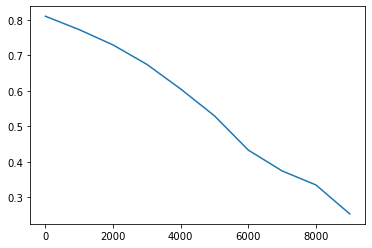

In [41]:
name="prog_w_inj_10_10_1000.json"
load=log.load(name)
fig, ax = plt.subplots()
ax.plot(x,load)
fig.savefig("images/"+name+".png")


## Weight inj with value 0

In [2]:


#Set up Test Variables:

#Change test batch size
num_batches=100

transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

testset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=transform_test)

test_batch_size=int(numpy.shape(testset.data)[0]/num_batches)
#test_batch_size=100

testloader = torch.utils.data.DataLoader(
    testset, batch_size=test_batch_size, shuffle=False, num_workers=2)

test_features, test_labels = next(iter(testloader))
#Get num channels, width and height of input data
c,w,h=list(test_features[0].size())
#Batchsize, see load18.py or main.py for batch size
num_batches=int(numpy.shape(testset.data)[0]/test_batch_size)

#Check GPU avilability
torch.cuda.is_available()

from many_inj import progressive_inj_zero

Files already downloaded and verified


True

In [3]:
from many_inj import progressive_inj_zero

In [40]:
model = load.load('bs_1024_sch_cosine/bs_1024_sch_cosine_best_acc')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

res= progressive_inj_zero(pfi_model,10,5,step=100)

# log.save(res,"")

0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
0.7622
1
N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  990.76196
2
N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  1990.76152
3
N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  2990.7603
4
N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  3990.7614799999999999
5
N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500


In [41]:
res

[0.7622,
 0.76196,
 0.76152,
 0.7603,
 0.7614799999999999,
 0.76202,
 0.7609400000000001,
 0.7626000000000001,
 0.76,
 0.75974]

In [44]:


model = load.load('bs_64_sch_cosine_wd_5e-4/bs_64_sch_cosine_wd_5e-4_epoch_300')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())



res= progressive_inj_zero(pfi_model,20,5,step=100)

0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
0.673
1
N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  990.6724
2
N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  1990.6719
3
N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  2990.67288
4
N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  3990.67274
5
N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  

In [49]:
name= "bs_64_sch_cosine" + "_prog_inj_zero" + "_2k_step_100"
log.save(res,name)

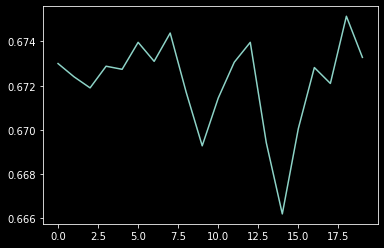

In [47]:
plt.plot(res)

In [50]:
model = load.load('bs_64_sch_cosine_wd_5e-4/bs_64_sch_cosine_wd_5e-4_epoch_300')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())



res= progressive_inj_zero(pfi_model,30,5,step=100)

0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
0.673
1
N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  990.6717000000000001
2
N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  1990.6734600000000001
3
N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  2990.67326
4
N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  3990.67242
5
N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N inject

In [ ]:
name= "bs_64_sch_cosine" + "_prog_inj_zero" + "_3k_step_100"
log.save(res,name)

In [10]:
model = load.load('bs_1024_sch_cosine/bs_1024_sch_cosine_best_acc')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

res= progressive_inj_zero(pfi_model,30,5,step=100)

name= "bs_1024_sch_cosine" + "_prog_inj_zero" + "_3k_step_100"
log.save(res,name)

TypeError: progressive_inj_zero() got multiple values for argument 'step'

In [9]:
model_name = "bs_1024_sch_cosine"
model_exact_name = model_name + "_best_acc"

model = load.load(model_name + '/' + model_exact_name)

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

avg,std= progressive_inj_zero(pfi_model,10000,1000,5)

res = [avg,std]

name= model_name + "_prog_inj_zero" + "_10k_step_1k"
log.save(res,name)

N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  5000
 Injection:  4999N injections:  5000
 Injection:  4999N injections:  5000
 Injection:  4999N injections:  5000
 Injection:  4999N injections:  5000
 Injection: 

In [11]:
res

[[0.7622,
  0.75762,
  0.7577200000000001,
  0.75466,
  0.75684,
  0.74412,
  0.7484999999999999,
  0.75288,
  0.7505400000000001,
  0.73616],
 [0.0,
  0.003547618919782666,
  0.0010906878563548667,
  0.0073904262393991995,
  0.002210520300743678,
  0.010030633080718285,
  0.006793231925968669,
  0.005885031860576462,
  0.006256069053327347,
  0.01114820164869654]]

In [22]:
np.array(res[0]) - np.array(res[1])

array([0.7622    , 0.75407238, 0.75662931, 0.74726957, 0.75462948,
       0.73408937, 0.74170677, 0.74699497, 0.74428393, 0.7250118 ])

In [27]:
mean-standard_dev

array([0.7622    , 0.75407238, 0.75662931, 0.74726957, 0.75462948,
       0.73408937, 0.74170677, 0.74699497, 0.74428393, 0.7250118 ])

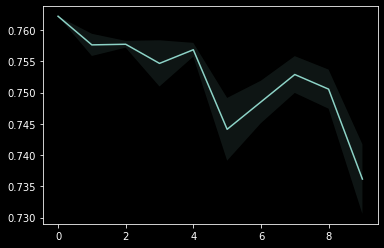

In [46]:
mean= np.array(res[0])
standard_dev= np.array(res[1])/2

y=range(10)

plt.clf()

plt.plot(y,mean)

plt.fill_between(y, mean-standard_dev, mean+standard_dev, alpha = 0.1)

In [26]:
mean

array([0.7622 , 0.75762, 0.75772, 0.75466, 0.75684, 0.74412, 0.7485 ,
       0.75288, 0.75054, 0.73616])

In [ ]:
def testeo():
    return 1,2

res = uno,dos = testeo()

In [ ]:
#Countinue in file: weight_inj_zero.ipynb

# Weight Statistics

In [12]:
import load
net_default=load.load('checkpoint_default',num_classes=1000)
net_256=load.load('default_b_size_256')
net_512=load.load('default_b_size_512')

In [1]:
#run only if you want to load the git resnet
%run load18.py

In [2]:
net_default=net #just to avoid changing following lines

In [7]:
list(net_default.named_parameters())[0][1]

Parameter containing:
tensor([[[[ 6.8073e-02,  4.7469e-02,  4.3604e-02,  ...,  4.4675e-02,
            9.6731e-03,  9.0030e-02],
          [ 4.2317e-02,  2.4179e-02,  3.2747e-03,  ...,  2.8515e-02,
            1.3432e-02,  1.3141e-01],
          [-5.5065e-02, -3.2383e-02, -3.8204e-02,  ..., -4.2792e-03,
            1.5569e-02,  1.6446e-01],
          ...,
          [-9.7793e-02, -1.0946e-01, -1.3131e-01,  ...,  3.1130e-03,
            9.1944e-02,  2.4652e-01],
          [-6.1215e-02, -9.2855e-02, -1.3321e-01,  ..., -1.4340e-03,
            6.3432e-02,  2.2755e-01],
          [-6.4873e-02, -8.5755e-02, -1.1503e-01,  ..., -1.9613e-02,
            2.2816e-02,  1.8432e-01]],

         [[ 3.4517e-02,  3.8950e-02,  2.2077e-02,  ..., -1.0147e-02,
           -5.4227e-02,  6.6323e-02],
          [ 1.7346e-02,  3.2819e-02,  9.6627e-03,  ..., -4.7523e-02,
           -6.8340e-02,  9.2135e-02],
          [-6.7472e-02, -3.3941e-03, -2.7016e-03,  ..., -5.7532e-02,
           -5.8558e-02,  1.3055e-01]

In [18]:
list(net_default.named_parameters())[0][1].size()==torch.Size([64, 3, 7, 7])

True

In [5]:
ts=torch.Size([64, 3, 7, 7])

64

In [8]:
net_default

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [3]:
conv_w=[]
for name, param in net_default.named_parameters():
    if "conv" in name and param.size()[2] == 3:
        for i in param.tolist():
            for j in i:
                conv_w.append(j)


In [9]:
conv_w_np=np.array(conv_w)

In [10]:
print(min(np.array(conv_w).flatten()))
print(max(np.array(conv_w).flatten()))
print(np.array(conv_w).flatten().mean())
print(np.array(conv_w).flatten().std())

-0.43172767758369446
0.523142397403717
-0.00043260394141426636
0.006091553020564397


In [11]:
print(conv_w_np.mean(axis=0))
print(conv_w_np.std(axis=0))

[[-0.00033941 -0.0003761  -0.00041287]
 [-0.00041262 -0.0005359  -0.0004768 ]
 [-0.00040751 -0.00046638 -0.00046583]]
[[0.00568966 0.00603247 0.00596442]
 [0.00594336 0.00615067 0.00631569]
 [0.00595921 0.00641953 0.00631134]]


In [12]:
conv_w_np.shape

(1220800, 3, 3)

In [13]:
slicing=[]
for i in range(3):
    for j in range(3):
        slicing.append(conv_w_np[:,i,j])

In [86]:
slicing[0]

array([-7.53056351e-03,  3.21827978e-02, -5.10245450e-02, ...,
        6.87719082e-09,  1.09565281e-08, -6.25728847e-09])

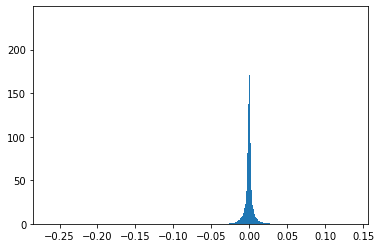

In [14]:
from matplotlib import pyplot as plt
_=plt.hist(slicing[0], bins=500, density=True)

In [23]:
p1=np.percentile(slicing[0],1,interpolation="nearest")
p90=np.percentile(slicing[0],95,interpolation="nearest")

In [24]:
slicing[0].sort()

In [25]:
slicing[0]

array([-0.26463583, -0.14968054, -0.14266723, ...,  0.12593283,
        0.12597671,  0.13650124])

In [26]:
p1idx=np.where(slicing[0]==p1)[0][0]
p90idx=np.where(slicing[0]==p90)[0][0]

In [27]:
p90idx

1159759

In [28]:
slicing_p=slicing[0][p1idx:p90idx]

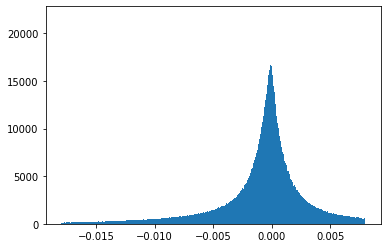

In [29]:
_=plt.hist(slicing_p,bins=500)

In [30]:
#Most frequent values:
values, counts = np.unique(slicing[0], return_counts=True)

ind = np.argmax(counts)
print(values[ind])  # prints the most frequent element

ind = np.argpartition(-counts, kth=10)[:10]
print(values[ind])  # prints the 10 most frequent elements
max(counts)

-0.0046138884499669075
[ 0.00260003  0.00169403 -0.0006878   0.00080859 -0.00241939 -0.00300754
  0.00316674 -0.00046397  0.00207949 -0.00219031]


3

In [31]:
from scipy import stats

stats.kurtosis(slicing[0])
#The distributions has a high kurtosis

18.021676918224284

# Train Test

In [31]:
print.__name__

'print'

# End Process

In [ ]:
import az_manage_proc
az_manage_proc.delete()

Found existing instance, use it.
Deleting....